In [37]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import argparse

script_n = 'pfs_connectivity_ratio_210306'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

max_dist = 150
threshold = 6

from weight_database import WeightDatabase
weightdb = WeightDatabase()

# weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_201224_setup01_syndb_threshold_10_coalesced.gz')
weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_210101_setup01_syndb_threshold_10_coalesced_filtered_10.gz')
weightdb.load_touch_db(
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/purkinje/db_pf_contacts_201224.gz',
    max_dist=max_dist
    )

In [62]:
import compress_pickle
db_f = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/pfs_density_db_210306.gz'
pf_db = compress_pickle.load(db_f)

mpd = MyPlotData()
n_pfs = 0

for block in pf_db:
    block_pfs = pf_db[block]['pfs']
    if len(block_pfs) == 0:
        continue
    rates = []
    for pf in block_pfs:
        n_pfs += 1
        rate = weightdb.calc_connection_rate(pf)
        rates.append(rate)
    avg = sum(rates) / len(rates)
    print(f'{block}: {avg}')
    mpd.add_data_point(
        y=pf_db[block]['y_dist'],
        rate=avg*100,
    )

print(f'n_pfs = {n_pfs}')

x100y50: 0.418232878232878
x100y58: 0.4717812211429232
x100y66: 0.4754853268306181
x100y74: 0.524373363262252
x100y82: 0.4737346407800953
x100y90: 0.5150343352471012
x100y42: 0.4269269045131114
x108y42: 0.42594710844710837
x108y50: 0.4686868686868687
x108y58: 0.4844114341901952
x108y66: 0.5484531024531025
x108y74: 0.4962827988338193
x108y82: 0.5332024457024457
x108y90: 0.48367117117117114
x116y42: 0.40244893051015496
x116y50: 0.44538653938653944
x116y58: 0.43783738191632937
x116y66: 0.5371993224167139
x116y74: 0.5031525573192239
x116y82: 0.5303840877914953
x116y90: 0.5543714797747057
x124y42: 0.42632428177882714
x124y50: 0.46403278369570494
x124y58: 0.4729009472911911
x124y66: 0.5537621692033458
x124y74: 0.5390430140430141
x124y82: 0.5113543266769073
x124y90: 0.68015873015873
x92y42: 0.35666632025692424
x92y50: 0.42478165853962013
x92y58: 0.4404826839826842
x92y66: 0.4324837555606785
x92y74: 0.506509634156693
x92y82: 0.5448097676970917
x92y90: 0.5173831569664905
x84y42: 0.3683964340744

Height: 4, Aspect: 1.33


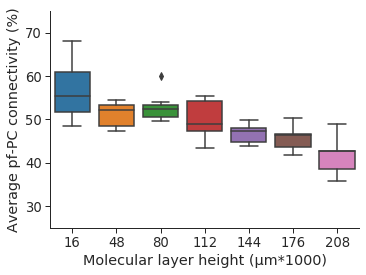

In [46]:


importlib.reload(my_plot); my_plot.my_cat_bar_plot(
    mpd,
    x="y",
    y="rate",
    # hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
    ylim=[25, 75],
    context='paper',
    kind='box',
#     font_scale=1.4,
#     add_swarm=True,
#     inner='box',
    height=4,
#     bw=.25,
#     cut=0,
    y_axis_label='Average pf-PC connectivity (%)',
    x_axis_label='Molecular layer height (µm*1000)',
    save_filename=f'{script_n}_max_dist_{max_dist}_threshold_{threshold}.svg',
    show=True,
    )


Height: 2, Aspect: 2.0


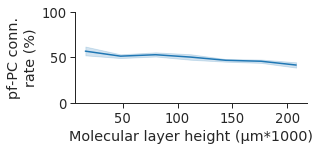

In [61]:


importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x="y",
    y="rate",
    ylim=[0, 100],
    context='paper',
#     kind='box',
    height=2,
    width=4,
    y_axis_label='pf-PC conn.\nrate (%)',
    x_axis_label='Molecular layer height (µm*1000)',
    save_filename=f'{script_n}_max_dist_{max_dist}_threshold_{threshold}_line.svg',
    show=True,
    )
